# One-Mass Model

*These notes are based on an assignment given by Brad Story to his students*

### Overview
We know that this is true in a mass-spring-damper system: \
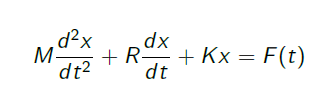\
The mass times the acceleration of the mass, the damping force times the velocity of the mass, and the stiffness of the spring times the displacement of the mass all add up to the total force in the system.\
Here is an alternative dot notation:\
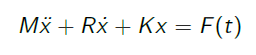

### Calculating velocity (first derivative)
Theoretically, time is a variable defined by a limit that approaches zero:\
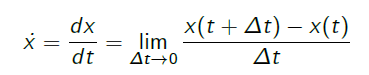\
But it is practical to think of time in terms of samples:\
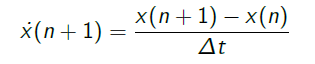\
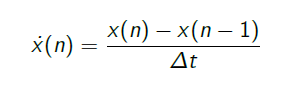\
Where n is the time sample index.


### Calculating acceleration (second derivative)
Acceleration is defined as:\
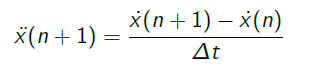\
But we can plug our velocity equations in to get:\
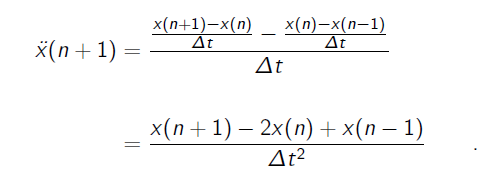

### Numerical solution
Plug everything in and we get:\
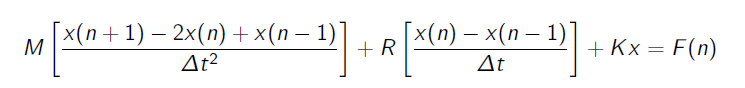\
This form is still a differential equation, where the point is to look at the relationship between the function and its component derivatives. If we want to look at in terms of the displacement of the mass over time, we need to think about it differently. An algebraic difference equation allows us to look at the whole system in terms of the value of a specific variable at a specific point in time (or sample). We can find the displacement at each moment in time as long as we have the previous displacement using the following difference equation:\
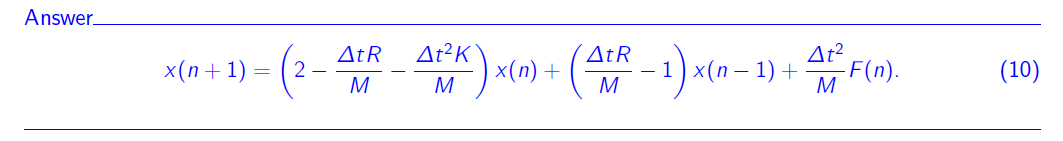


### Imports

In [43]:
using Plots

### Parameters

In [ ]:
M = 1 # mass in grams
R = 35 # resistance in dyn s/cm
K = 30000 # stiffness dyn/cm
delta_t = 0.0001 # sampling interval in s
dur = 1 # duration in seconds
x1 = 0.1 # deflection of first sample in cm
x2 = 0.1 # deflection of second sample in cm

# preliminary calculations
samps = Int64(dur / delta_t) # total number of samples
F = zeros(samps) # force applied at each sample
x = zeros(samps) # displacement at each sample
x[1] = x1
x[2] = x2

0.1

In [49]:
# Gets the next displacement of the mass given previous displacement and other variables

function get_next_displacement(n, M, R, K, delta_t)
    return (2 - ((delta_t*R)/M) -(((delta_t^2)*K)/M))*x[n] + (((delta_t*R)/M)-1)*x[n-1] + ((delta_t^2)/M)*F[n]
end

get_next_displacement (generic function with 1 method)

In [50]:
for n in 2:samps-1
    x[n+1] = get_next_displacement(n, M, R, K, delta_t)
end

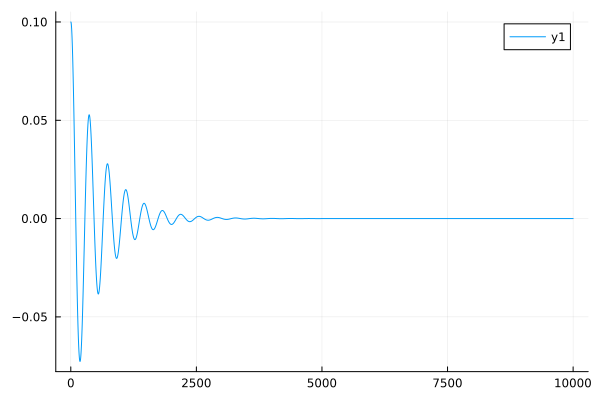

In [51]:
plot(x)